In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('E:/Python/AI/Project/EndtoEnd/Notebook/Data/stud.csv')
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df['average_score'] =( df['math_score']+ df['reading_score']+df['writing_score']) / 3

In [5]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,49.333333


In [6]:
score = ['math_score','reading_score','writing_score','average_score']
for i in score:
    mean = df[i].mean()
    print(mean)
    stan = df[i].std()
    print(stan)
    lower = mean - stan*2
    upper  = mean + stan*2
    print(lower, upper)
    df = df[(df[i]>lower) & (df[i]<upper)]
    print(df.info())
    df.head()

66.089
15.163080096009468
35.76283980798107 96.41516019201893
<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       954 non-null    object 
 1   race_ethnicity               954 non-null    object 
 2   parental_level_of_education  954 non-null    object 
 3   lunch                        954 non-null    object 
 4   test_preparation_course      954 non-null    object 
 5   math_score                   954 non-null    int64  
 6   reading_score                954 non-null    int64  
 7   writing_score                954 non-null    int64  
 8   average_score                954 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 74.5+ KB
None
69.57023060796645
13.361068351028939
42.84809390590857 96.29236731002433
<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 

In [7]:
x = df.iloc[:,:-1]
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
994,male,group A,high school,standard,none,63,63,62
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
y =df.iloc[:,-1]
y

0      72.666667
1      82.333333
3      49.333333
4      76.333333
5      77.333333
         ...    
994    62.666667
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_score, Length: 872, dtype: float64

In [9]:
# Select numerical features that are not of object data type
numerical_features = x.select_dtypes(exclude = 'object').columns
print(numerical_features)
# Select categorical features that are of object data type
categorical_features = x.select_dtypes(include = 'object').columns
print(categorical_features)

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [10]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("Standard Scaler", numerical_transformer, numerical_features),
        ("OneHotEncoder", categorical_transformer, categorical_features)
    ]
    
)


In [11]:
print(x.shape)
x = preprocessor.fit_transform(x)
print(x)

(872, 8)
[[ 0.43586848  0.18663683  0.44004704 ...  1.          0.
   1.        ]
 [ 0.18815353  1.77527658  1.62882647 ...  1.          1.
   0.        ]
 [-1.62842284 -1.13722963 -2.10733745 ...  0.          0.
   1.        ]
 ...
 [-0.637563    0.09837907 -0.32416831 ...  0.          1.
   0.        ]
 [ 0.10558187  0.71618341  0.69478549 ...  1.          1.
   0.        ]
 [ 0.84872675  1.42224553  1.45900084 ...  0.          0.
   1.        ]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=20)

In [13]:
print(f"{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")

(584, 20) (288, 20) (584,) (288,)


In [14]:
def model_evaluation(true, predicted):
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, r2

In [15]:
#model block
model = {
    #Primary selection of model
    "K-near Neighbor": KNeighborsRegressor(),
    "Decission Tree":  DecisionTreeRegressor(),
    "Random Forest regressr": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector": SVR(),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "CatBoost": CatBoostRegressor(verbose=False),
    "XGBoost": XGBRegressor()
}

In [16]:
model_list = []
r2 = []
mse = []
for i in range(len(list(model))):
    #training block
    models = list(model.values())[i]
    models.fit(X_train, y_train)
    
    #prediction block
    training_data_prediction = models.predict(X_train)
    testing_data_prediction = models.predict(X_test)
    
    #model evaluation block
    #for training Data
    training_mse , training_r2 = model_evaluation(y_train,training_data_prediction)
    #for testing Data
    testing_mse, testing_r2 = model_evaluation(y_test,testing_data_prediction)
    model_list.append(list(model.keys())[i])
    r2.append(testing_r2)
    mse.append(testing_mse)
    print("-----------------------------")
    print(f"Model : {model_list[i]}")
    print(f"Trainig")
    print(f"Mean squared error : {training_mse}")
    print(f"R2 : {training_r2}")
    print("Testing")
    print(f"Mean squared error : {testing_mse}")
    print(f"R2 : {testing_r2}")
    print("\n")
    

-----------------------------
Model : K-near Neighbor
Trainig
Mean squared error : 3.1840943683409435
R2 : 0.972476558417002
Testing
Mean squared error : 4.867253086419749
R2 : 0.9590786345348562


-----------------------------
Model : Decission Tree
Trainig
Mean squared error : 0.0
R2 : 1.0
Testing
Mean squared error : 2.514274691358025
R2 : 0.9788612690365552


-----------------------------
Model : Random Forest regressr
Trainig
Mean squared error : 0.08586999619482505
R2 : 0.9992577362506904
Testing
Mean squared error : 0.5059963348765442
R2 : 0.9957458425572159


-----------------------------
Model : AdaBoost
Trainig
Mean squared error : 1.26911723981528
R2 : 0.9890296988181817
Testing
Mean squared error : 1.5292657880278548
R2 : 0.9871427182654968


-----------------------------
Model : Support Vector
Trainig
Mean squared error : 1.2187775065516986
R2 : 0.9894648375256145
Testing
Mean squared error : 1.0579890620569126
R2 : 0.9911049710590657


-----------------------------
Model 

In [17]:
results = pd.DataFrame(list(zip(model_list, r2, mse)), columns=['Model Name', 'R2_Score', 'MSE Score']).sort_values(by= ['R2_Score'], ascending = False)
results

,Model Name,R2_Score,MSE Score
5,Linear Regression,1.000000,1.670632e-28
6,Ridge,0.999999,7.331062e-05
8,CatBoost,0.999245,8.975604e-02
9,XGBoost,0.995764,5.038012e-01
2,Random Forest regressr,0.995746,5.059963e-01
4,Support Vector,0.991105,1.057989e+00
7,Lasso,0.989652,1.230837e+00
3,AdaBoost,0.987143,1.529266e+00
1,Decission Tree,0.978861,2.514275e+00
0,K-near Neighbor,0.959079,4.867253e+00


In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':testing_data_prediction,'Difference':y_test-testing_data_prediction})
pred_df

,Actual Value,Predicted Value,Difference
78,69.000000,68.411484,0.588516
240,69.000000,69.273354,-0.273354
71,60.333333,60.798233,-0.464900
725,75.333333,74.426033,0.907300
438,59.000000,60.144543,-1.144543
...,...,...,...
668,69.333333,69.834450,-0.501116
490,75.333333,75.480743,-0.147410
469,80.333333,80.097679,0.235654
282,78.666667,78.819672,-0.153005


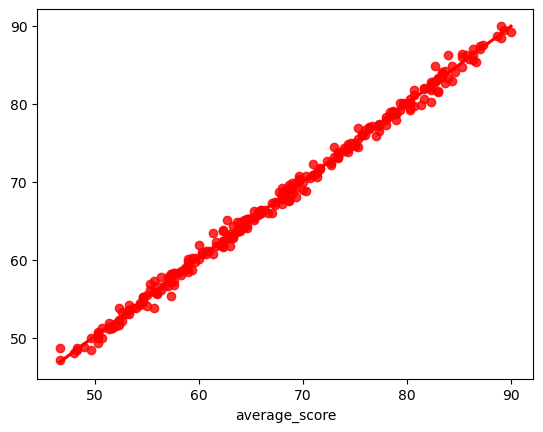

In [19]:
sns.regplot(x=y_test,y=testing_data_prediction,ci=None,color ='red');

In [22]:
lin_model = KNeighborsRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 95.91
